Мы предполагаем, что продавать успокаивающие чаи в страны с не очень большим индексом счастья и продолжительности здоровой жизни, так как успокаивающие травы оказывают положительное влияние на нервную систему. Потом из этих стран будут выбраны те страны, в которые можно доставлять чаи по суше.

In [1]:
#ссылка на датасет
original_url = 'https://www.kaggle.com/code/gcmadhan/world-happiness-index-report/input?select=world-happiness-report-2021.csv'

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/world-happiness-report-2021.csv')
df.sort_values('Healthy life expectancy')
good_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Healthy life expectancy', ]
df = df[good_columns]

#хочу подчеркнуть здоровую продолжительность жизни
scaler = MinMaxScaler()
df[['Ladder score_norm', 'Healthy life expectancy_norm']] = scaler.fit_transform(
    df[['Ladder score', 'Healthy life expectancy']])

a = 0.8
b = 0.2
df['New_Score'] = a * df['Ladder score_norm'] + b * df['Healthy life expectancy_norm']
df

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Ladder score_norm,Healthy life expectancy_norm,New_Score
0,Finland,Western Europe,7.842,72.000,1.000000,0.826058,0.965212
1,Denmark,Western Europe,7.620,72.700,0.958263,0.850641,0.936738
2,Switzerland,Western Europe,7.571,74.400,0.949051,0.910342,0.941309
3,Iceland,Western Europe,7.554,73.000,0.945854,0.861176,0.928919
4,Netherlands,Western Europe,7.464,72.400,0.928934,0.840105,0.911168
...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,48.700,0.185937,0.007796,0.150309
145,Botswana,Sub-Saharan Africa,3.467,59.269,0.177477,0.378964,0.217774
146,Rwanda,Sub-Saharan Africa,3.415,61.400,0.167701,0.453802,0.224921
147,Zimbabwe,Sub-Saharan Africa,3.145,56.201,0.116939,0.271220,0.147795


In [2]:
unique_regions = df['Regional indicator'].unique().tolist()
#удаление регионов, куда мы не сможем доставить и некоторые регионы азии из-за высокой потенциальной конкуренции
for index, row in df.iterrows():
  if row['Regional indicator'] in ['North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean', 'East Asia', 'Sub-Saharan Africa', 'South Asia',  'Southeast Asia']:
    df.drop(index, inplace = True)
df

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Ladder score_norm,Healthy life expectancy_norm,New_Score
0,Finland,Western Europe,7.842,72.000,1.000000,0.826058,0.965212
1,Denmark,Western Europe,7.620,72.700,0.958263,0.850641,0.936738
2,Switzerland,Western Europe,7.571,74.400,0.949051,0.910342,0.941309
3,Iceland,Western Europe,7.554,73.000,0.945854,0.861176,0.928919
4,Netherlands,Western Europe,7.464,72.400,0.928934,0.840105,0.911168
5,Norway,Western Europe,7.392,73.300,0.915398,0.871712,0.906661
6,Sweden,Western Europe,7.363,72.700,0.909945,0.850641,0.898085
7,Luxembourg,Western Europe,7.324,72.600,0.902613,0.847129,0.891516
9,Austria,Western Europe,7.268,73.300,0.892085,0.871712,0.888010
12,Germany,Western Europe,7.155,72.500,0.870840,0.843617,0.865396


In [3]:
url_general = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area'
#теперь получу ссылки на каждую страну и получу координаты ее столицы
import pandas as pd
import requests
from bs4 import BeautifulSoup

html = requests.get(url_general).text
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})

countries = []
links = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')

    country_cell = cells[1]
    country_name = country_cell.text.strip()
    link = country_cell.find('a')
    if link:
        link = "https://en.wikipedia.org" + link['href']
    else:
        link = None
    countries.append(country_name)
    links.append(link)

df_coord = pd.DataFrame({'Country name': countries, 'Link': links})
#удаляю первую строчку, там country name = earth, что не имеет смысла
df_coord = df_coord.drop(0)
#удаляю строку, где вместо страны было такое 9,525,067 (3,677,647)
df_coord = df_coord.drop(5)
#соединяю 2 датасета в один, чтобы потом найти координаты
df_coord = pd.merge(df, df_coord, on ='Country name')
df_coord

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Ladder score_norm,Healthy life expectancy_norm,New_Score,Link
0,Finland,Western Europe,7.842,72.000,1.000000,0.826058,0.965212,https://en.wikipedia.org/wiki/Finland
1,Denmark,Western Europe,7.620,72.700,0.958263,0.850641,0.936738,https://en.wikipedia.org/wiki/Denmark
2,Switzerland,Western Europe,7.571,74.400,0.949051,0.910342,0.941309,https://en.wikipedia.org/wiki/Switzerland
3,Iceland,Western Europe,7.554,73.000,0.945854,0.861176,0.928919,https://en.wikipedia.org/wiki/Iceland
4,Netherlands,Western Europe,7.464,72.400,0.928934,0.840105,0.911168,https://en.wikipedia.org/wiki/Netherlands
5,Norway,Western Europe,7.392,73.300,0.915398,0.871712,0.906661,https://en.wikipedia.org/wiki/Norway
6,Sweden,Western Europe,7.363,72.700,0.909945,0.850641,0.898085,https://en.wikipedia.org/wiki/Sweden
7,Luxembourg,Western Europe,7.324,72.600,0.902613,0.847129,0.891516,https://en.wikipedia.org/wiki/Luxembourg
8,Austria,Western Europe,7.268,73.300,0.892085,0.871712,0.888010,https://en.wikipedia.org/wiki/Austria
9,Germany,Western Europe,7.155,72.500,0.870840,0.843617,0.865396,https://en.wikipedia.org/wiki/Germany


In [4]:
def get_coordinates(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        good_coord = soup.find_all('span', class_='geo')
        #в англоязычной википедии в начале страницы есть еще одни координаты, которые мне не нужны, поэтому беру второе вхождение
        good_coord =  good_coord[1].text
        lat = float(good_coord.split(';')[0].strip())
        lon = float(good_coord.split(';')[1].strip())
        return lat, lon
    except:
        return None, None

In [5]:
df_coord['latitude'] = None
df_coord['longitude'] = None
for index, row in df_coord.iterrows():
    URL = row['Link']
    coordinates = get_coordinates(URL)
    df_coord.at[index, 'latitude'] = coordinates[0]
    df_coord.at[index, 'longitude'] = coordinates[1]
df_coord

,Country name,Regional indicator,Ladder score,Healthy life expectancy,Ladder score_norm,Healthy life expectancy_norm,New_Score,Link,latitude,longitude
0,Finland,Western Europe,7.842,72.000,1.000000,0.826058,0.965212,https://en.wikipedia.org/wiki/Finland,60.17083,24.9375
1,Denmark,Western Europe,7.620,72.700,0.958263,0.850641,0.936738,https://en.wikipedia.org/wiki/Denmark,55.717,12.567
2,Switzerland,Western Europe,7.571,74.400,0.949051,0.910342,0.941309,https://en.wikipedia.org/wiki/Switzerland,46.833,8.333
3,Iceland,Western Europe,7.554,73.000,0.945854,0.861176,0.928919,https://en.wikipedia.org/wiki/Iceland,64.133,-21.933
4,Netherlands,Western Europe,7.464,72.400,0.928934,0.840105,0.911168,https://en.wikipedia.org/wiki/Netherlands,52.367,4.883
5,Norway,Western Europe,7.392,73.300,0.915398,0.871712,0.906661,https://en.wikipedia.org/wiki/Norway,59.933,10.683
6,Sweden,Western Europe,7.363,72.700,0.909945,0.850641,0.898085,https://en.wikipedia.org/wiki/Sweden,59.35,18.067
7,Luxembourg,Western Europe,7.324,72.600,0.902613,0.847129,0.891516,https://en.wikipedia.org/wiki/Luxembourg,49.6106,6.1328
8,Austria,Western Europe,7.268,73.300,0.892085,0.871712,0.888010,https://en.wikipedia.org/wiki/Austria,48.2,16.35
9,Germany,Western Europe,7.155,72.500,0.870840,0.843617,0.865396,https://en.wikipedia.org/wiki/Germany,52.517,13.383


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
fig = px.scatter(
    data_frame=df,
    x='Ladder score',
    y='Healthy life expectancy',
    color='Regional indicator',
    hover_name='Country name',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    size_max=10,
    title='Зависимость между Ladder Score и Healthy Life Expectancy'
)

fig.update_layout(
    width=800,
    height=600,
    xaxis_title='Ladder Score',
    yaxis_title='Healthy Life Expectancy',
    legend_title='Regional Indicator'
)

fig.show()

<ipython-input-33-e2be18129d1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


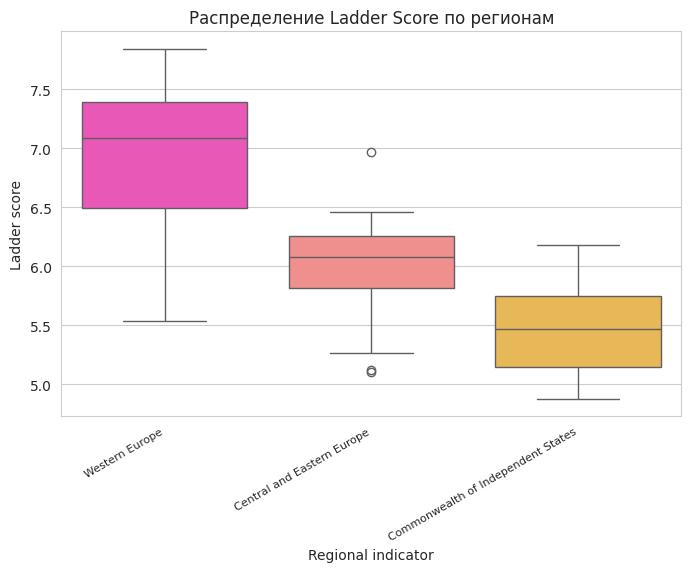

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='Regional indicator',
    y='Ladder score',
    palette='spring')
plt.title('Распределение Ladder Score по регионам')
plt.xticks(rotation=30, ha='right', fontsize=8)
plt.show()

Самая низкая медиана в странах СНГ, в основном продавать будем туда, но и в несколько стран и центральной и восточной Европы, которые сильно выбиваются из своей категории

<ipython-input-47-c06852e654e4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-47-c06852e654e4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-47-c06852e654e4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




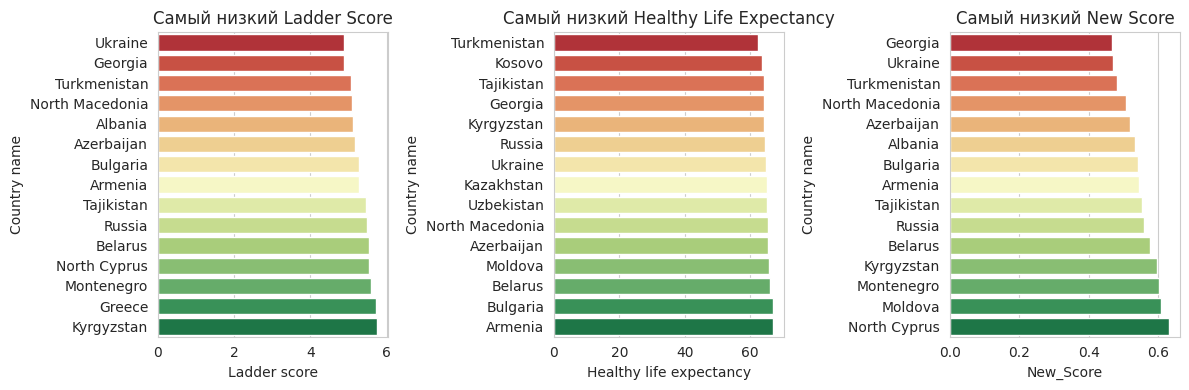

In [47]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#функция для построения столбчатой диаграммы по каждому из трех показателей
def top_bottom_15(ax, df, column, title):
    bottom_15 = df.nsmallest(15, column)
    sns.barplot(data=bottom_15,
                x=column,
                y='Country name',
                palette='RdYlGn',
                ax = ax)
    ax.set_title(title)

top_bottom_15(axes[0], df, 'Ladder score', 'Самый низкий Ladder Score')
top_bottom_15(axes[1], df, 'Healthy life expectancy', 'Самый низкий Healthy Life Expectancy')
top_bottom_15(axes[2], df, 'New_Score', 'Самый низкий New Score')

plt.tight_layout()
plt.show()

Наборы стран в графиках выше очень схожи, будем использовать показатель New score

In [48]:
fig = px.choropleth(
    df_coord,
    locations='Country name',
    locationmode='country names',
    color='New_Score',
    hover_name='Country name',
    hover_data='Healthy life expectancy',
    title='Уровень счастья по странам, в которые мы потенциально захотим продавать чаи',
    color_continuous_scale=px.colors.diverging.RdYlGn,
    projection='natural earth'
)
fig.show()

In [60]:
top_new_score = df_coord.sort_values(by='New_Score').head(15)['Country name'].tolist()
new_lines = []
for index, row in df_coord.iterrows():
  if row['Country name'] in top_new_score:
    new_lines.append(row)
final_df = pd.DataFrame(new_lines)
final_df
final_df.to_csv('final_df.csv') #дальше мне нужно перейти в VS, чтобы использовать Selenium, поэтому вытаскиваю готовые данные
